In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
%matplotlib inline

In [162]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [163]:
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]


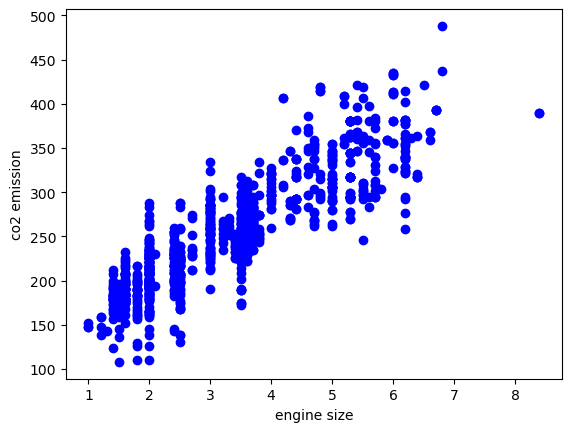

In [164]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('engine size')
plt.ylabel('co2 emission')
plt.show()

In [166]:
msk = np.random.rand(len(df)) < 0.8
train=cdf[msk]
test=cdf[~msk]

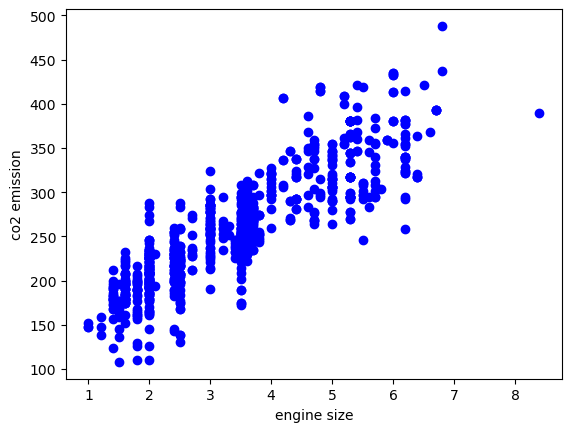

In [167]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('engine size')
plt.ylabel('co2 emission')
plt.show()

In [181]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict( np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]))
x = np.asanyarray( np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]))
y = np.asanyarray(test[['CO2EMISSIONS']])


Coefficients:  [[10.63018535  7.12082106  6.55803489  2.76523374]]


In [215]:
def accu(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    precision_percent = (1 - rmse / np.mean(y_test)) * 100
    print(f"accuracy : {precision_percent:.2f}%")
accu(y,y_)

accuracy : 91.30%


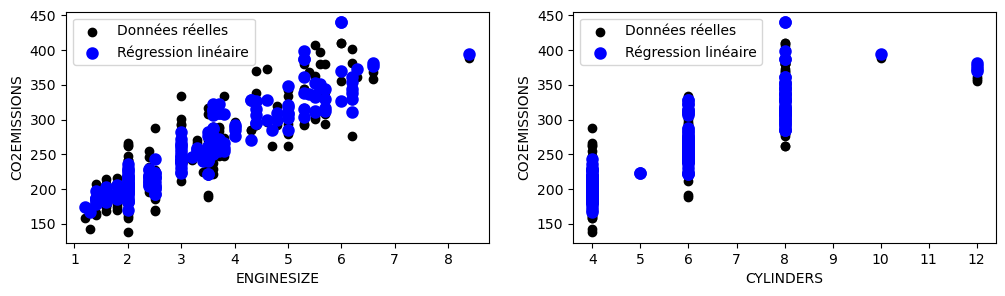

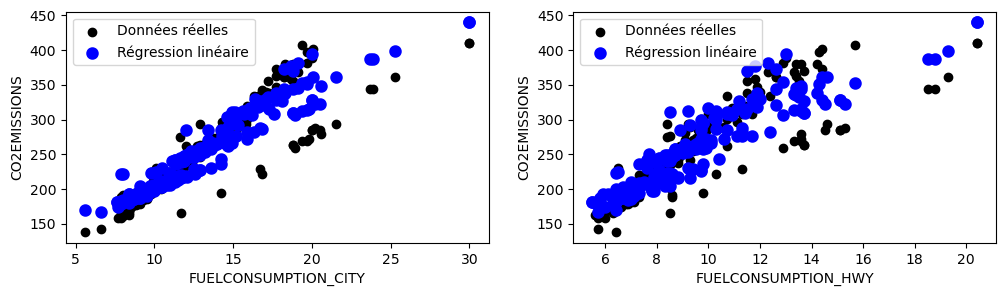

In [214]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
fig1, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 3))

# Premier sous-graphique : ENGINESIZE
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='black', label='Données réelles')
ax1.scatter(x[:, 0], y_, color='blue', linewidth=3, label='Régression linéaire')
ax1.set_xlabel('ENGINESIZE')
ax1.set_ylabel('CO2EMISSIONS')
ax1.legend()

# Deuxième sous-graphique : CYLINDERS
ax2.scatter(test.CYLINDERS, test.CO2EMISSIONS, color='black', label='Données réelles')
ax2.scatter(x[:, 1], y_, color='blue', linewidth=3, label='Régression linéaire')
ax2.set_xlabel('CYLINDERS')
ax2.set_ylabel('CO2EMISSIONS')
ax2.legend()

# Troisième sous-graphique : FUELCONSUMPTION_CITY
ax3.scatter(test.FUELCONSUMPTION_CITY, test.CO2EMISSIONS, color='black', label='Données réelles')
ax3.scatter(x[:, 2], y_, color='blue', linewidth=3, label='Régression linéaire')
ax3.set_xlabel('FUELCONSUMPTION_CITY')
ax3.set_ylabel('CO2EMISSIONS')
ax3.legend()

# Quatrième sous-graphique : FUELCONSUMPTION_HWY
ax4.scatter(test.FUELCONSUMPTION_HWY, test.CO2EMISSIONS, color='black', label='Données réelles')
ax4.scatter(x[:, 3], y_, color='blue', linewidth=3, label='Régression linéaire')
ax4.set_xlabel('FUELCONSUMPTION_HWY')
ax4.set_ylabel('CO2EMISSIONS')
ax4.legend()


# Afficher la figure
plt.show()